# QA/QC pipeline testing

### Development of qaqc pipeline using xarray and pandas

- Functions tested for now:
    - qaqc_missing_latlon
    - qaqc_within_wecc
    - qaqc_elev_range
    - qaqc_precip_logic_nonegvals
    - qaqc_precip_logic_accum_amounts
    - spurious_buoy_check
    - qaqc_sensor_height_w
    - qaqc_sensor_height_t
    - qaqc_world_record
    - qaqc_crossvar_logic_tdps_to_tas
    - qaqc_crossvar_logic_calm_wind_dir

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import glob
import sys
import os
import warnings
import datetime
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [2]:
import calc_qaqc_pandas as cpd
import QAQC_pipeline_pandas as qpd 

import calc_qaqc_xarray as cxr
import QAQC_pipeline_xarray as qxr

import QAQC_pipeline_original as qor
from calc_qaqc import get_file_paths

In [3]:
files = np.sort(glob.glob("train_files/*.nc"))

In [4]:
# Set up error handling.
errors = {'File':[], 'Time':[], 'Error':[]} # Set up error handling
end_api = datetime.datetime.now().strftime('%Y%m%d%H%M') # Set end time to be current time at beginning of download: for error handling csv
timestamp = datetime.datetime.utcnow().strftime("%m-%d-%Y, %H:%M:%S")

## Test on a single file

In [4]:
network = "CAHYDRO"
fName = "train_files/CAHYDRO_LLLC1.nc"
rawdir, cleandir, qaqcdir, mergedir = get_file_paths(network)

In [5]:
ds = xr.open_dataset(fName)
station = ds.encoding['source'].split("/")[-1].split(".nc")[0]
ds

<xarray.Dataset>
Dimensions:       (station: 1, time: 147374)
Coordinates:
  * time          (time) datetime64[ns] 2016-12-14T17:00:00 ... 2022-08-31T23...
  * station       (station) object 'CAHYDRO_LLLC1'
    lat           (station, time) float64 ...
    lon           (station, time) float64 ...
Data variables:
    tas           (station, time) float64 ...
    pr            (station, time) float64 ...
    hurs          (station, time) float64 ...
    tas_qc        (station, time) object ...
    hurs_qc       (station, time) object ...
    tdps_derived  (station, time) float64 ...
    elevation     (station, time) float64 ...
Attributes: (12/13)
    title:                  CAHYDRO cleaned
    institution:            Eagle Rock Analytics / Cal Adapt
    source:                 
    history:                MADIS_clean.py script run on 02-07-2023, 14:35:13...
    comment:                Intermediate data product: may not have been subj...
    license:                
    ...                     ...
    disclaimer:             This document was prepared as a result of work sp...
    station_name:           SIMI VALLEY VENTURA
    raw_files_merged:       1
    anemometer_height_m:    nan
    thermometer_height_m:   nan
    barometer_elevation_m:  nan

In [6]:
ds0 = qor.whole_station_qaqc_local_pipeline(ds, network) 

Running QA/QC on:  CAHYDRO_LLLC1
pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [363.3216]
Elevation eraqc values pre-infilling: [nan]
Elevation values post-infilling/correcting: [363.3216]
Elevation qaqc values post-infilling/correcting: [nan]
pass qaqc_elev_range
Precip range:  0.0 - 0.0
Precipitation eraqc flags (any other value than nan is an active flag!): [nan]
pass qaqc_precip_logic_nonegvals
station does not report a precipitation duration variable - bypassing precip logic check
pass qaqc_precip_logic_accum_amounts
Flagging problem with anemometer sensor height for CAHYDRO_LLLC1, skipping
complete qaqc_sensor_height_w
complete qaqc_sensor_height_t
complete qaqc_world_record
                                      tas   pr  hurs tas_qc hurs_qc  \
station       time                                                    
CAHYDRO_LLLC1 2016-12-14 17:00:00     NaN  0.0  94.5    nan     nan   
              2016-12-14 17:05:00  289.27  0.0   NaN    nan     

In [7]:
ds1 = qxr.run_qaqc_pipeline(ds, network, fName, errors,
                            station, end_api, verbose=True
                           )

pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [363.3216]
Elevation eraqc values pre-infilling: [nan]
qaqc_elev_infill bypass
Elevation values post-infilling/correcting: [363.3216]
Elevation qaqc values post-infilling/correcting: [nan]
pass qaqc_elev_range
Precip range:  0.0 - 0.0
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
pass qaqc_precip_logic_nonegvals
pass qaqc_precip_logic_accum_amounts
qaqc_sensor_height_w failed with Exception: 'sfcWind_eraqc'
CAHYDRO_LLLC1 Flagging problem with anemometer sensor height for, skipping
pass qaqc_sensor_height_t
pass qaqc_world_record
tdps_derived eraqc flags (any other value than nan is an active flag!): [12. nan]
pass qaqc_crossvar_logic_tdps_to_tas
station does not report wind direction - bypassing wind cross-variable logic check
pass qaqc_crossvar_logic_calm_wind_dir


In [8]:
ds2 = qpd.run_qaqc_pipeline(ds, network, fName, errors,
                            station, end_api, verbose=True
                           )
# ds2 = ds2.reset_index().drop_duplicates(subset="time")
ds2 = ds2.sort_values(by='time')
ds2 = ds2.to_xarray()

pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [363.3216]
Elevation eraqc values pre-infilling: [nan]
pass qaqc_elev_range
Precip range:  0.0 - 0.0
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
pass qaqc_precip_logic_nonegvals
pass qaqc_precip_logic_accum_amounts
pass qaqc_sensor_height_w
pass qaqc_sensor_height_t
pass qaqc_world_record
tdps_derived eraqc flags (any other value than nan is an active flag!): [nan 12.]
pass qaqc_crossvar_logic_tdps_to_tas
station does not report wind direction - bypassing wind cross-variable logic check
pass qaqc_crossvar_logic_calm_wind_dir


In [9]:
ds0.time

<xarray.DataArray 'time' (time: 147374)>
array(['2016-12-14T17:00:00.000000000', '2016-12-14T17:05:00.000000000',
       '2016-12-14T17:15:00.000000000', ..., '2022-08-31T23:00:00.000000000',
       '2022-08-31T23:15:00.000000000', '2022-08-31T23:45:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-12-14T17:00:00 ... 2022-08-31T23:45:00

In [10]:
ds1.time

<xarray.DataArray 'time' (time: 147374)>
array(['2016-12-14T17:00:00.000000000', '2016-12-14T17:05:00.000000000',
       '2016-12-14T17:15:00.000000000', ..., '2022-08-31T23:00:00.000000000',
       '2022-08-31T23:15:00.000000000', '2022-08-31T23:45:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-12-14T17:00:00 ... 2022-08-31T23:45:00
Attributes:
    long_name:      time
    standard_name:  time
    comment:        In UTC.

In [11]:
ds2.time

<xarray.DataArray 'time' (time: 147374)>
array(['2016-12-14T17:00:00.000000000', '2016-12-14T17:05:00.000000000',
       '2016-12-14T17:15:00.000000000', ..., '2022-08-31T23:00:00.000000000',
       '2022-08-31T23:15:00.000000000', '2022-08-31T23:45:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-12-14T17:00:00 ... 2022-08-31T23:45:00

In [12]:
exclude_qaqc = ["time", "station", "lat", "lon", "qaqc_process", "sfcWind_method"] # lat and lon have a different qc check
era_qc_vars = [] # our qc variable

for var in ds0.variables:
    if '_eraqc' in var:
        era_qc_vars.append(var) # raw qc variable, need to keep for comparison, then drop
era_qc_vars

['tas_eraqc',
 'pr_eraqc',
 'hurs_eraqc',
 'tdps_derived_eraqc',
 'elevation_eraqc']

In [13]:
for var in era_qc_vars:
    print(var)
    diff1 = ds1[var]-ds0[var]
    diff1 = diff1.mean(), diff1.std()
    print("mean={:.1f}\tstd={:.1f}".format(diff1[0].values, diff1[1].values))
    
    diff2 = ds2[var]-ds0[var]
    diff2 = diff2.mean(), diff2.std()
    print("mean={:.1f}\tstd={:.1f}".format(diff2[0].values, diff2[1].values))

    print()

tas_eraqc
mean=0.0	std=0.0
mean=0.0	std=0.0

pr_eraqc
mean=nan	std=nan
mean=nan	std=nan

hurs_eraqc
mean=nan	std=nan
mean=nan	std=nan

tdps_derived_eraqc
mean=0.0	std=0.0
mean=0.0	std=0.0

elevation_eraqc
mean=nan	std=nan
mean=nan	std=nan



### Plot the eraqc variables to see if all 3 versions flag the same values

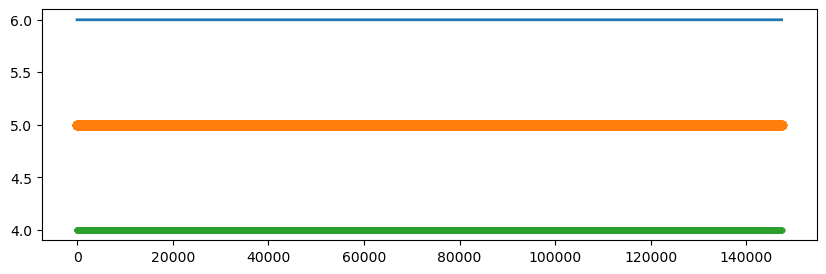

In [14]:
fig,ax = plt.subplots(figsize=(10,3))

ax.plot(ds0['tas_eraqc'][0]-0, lw=2)
ax.plot(ds1['tas_eraqc'][0]-1, 'o', markerfacecolor='none', alpha=0.15)
_ = ax.plot(ds2['tas_eraqc'][0]-2, '.', alpha=0.15)

In [29]:
# fig,ax = plt.subplots(figsize=(10,3))

# ax.plot(ds0['hus_eraqc'][0]-0, lw=2)
# ax.plot(ds1['hus_eraqc'][0]-1, 'o', markerfacecolor='none', alpha=0.15)
# _ = ax.plot(ds2['hus_eraqc'][0]-2, '.', alpha=0.15)


In [5]:
%%time

fName = files[1]
ds = xr.open_dataset(fName)
ds = ds.load()
ds = ds.drop_duplicates(dim="time")
network=fName.split("/")[-1].split("_")[0]
station=fName.split("/")[-1].split(".nc")[0]
network, station

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


CPU times: user 1.68 s, sys: 135 ms, total: 1.81 s
Wall time: 1.99 s


('ASOSAWOS', 'ASOSAWOS_72679824150')

In [24]:
%time ds0 = qor.whole_station_qaqc_local_pipeline(ds, network)

Running QA/QC on:  ASOSAWOS_72679824150
pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [1419. 1418. 1408. 1456. 1420.]
Elevation eraqc values pre-infilling: [nan]
Elevation values post-infilling/correcting: [1419.   1418.   1414.53 1418.69 1416.1  1418.19 1415.76]
Elevation qaqc values post-infilling/correcting: [nan  3.]
pass qaqc_elev_range
Precip range:  0.0 - 61.0
Precipitation eraqc flags (any other value than nan is an active flag!): [nan]
pass qaqc_precip_logic_nonegvals
station does not report a precipitation duration variable - bypassing precip logic check
pass qaqc_precip_logic_accum_amounts
complete qaqc_sensor_height_w
complete qaqc_sensor_height_t
complete qaqc_world_record
                                          ps     tas    tdps   pr  sfcWind  \
station              time                                                    
ASOSAWOS_72679824150 1980-01-01 00:00:00 NaN  279.25  266.55  0.0      8.2   
                     1980-01-01 01:00:

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/xarray/coding/times.py:576: RuntimeWarning: invalid value encountered in cast
  int_num = np.array(num, dtype=np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/xarray/coding/times.py:576: RuntimeWarning: invalid value encountered in cast
  int_num = np.array(num, dtype=np.int64)


CPU times: user 2.1 s, sys: 199 ms, total: 2.3 s
Wall time: 6.13 s


In [21]:
%%time
ds1 = qxr.run_qaqc_pipeline(ds.isel(station=0), network, fName, errors,
                            station, end_api, verbose=True)

pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [1408. 1418. 1419. 1420. 1456.]
Elevation eraqc values pre-infilling: [nan]
qaqc_elev_infill bypass
ASOSAWOS_72679824150 elevation out of range for WECC, skipping
Precip range:  0.0 - 61.0
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
pass qaqc_precip_logic_nonegvals
pass qaqc_precip_logic_accum_amounts
pass qaqc_sensor_height_w
pass qaqc_sensor_height_t
pass qaqc_world_record
tdps eraqc flags (any other value than nan is an active flag!): [nan]
pass qaqc_crossvar_logic_tdps_to_tas
qaqc_crossvar_logic_calm_wind_dir failed with Exception: too many indices
ASOSAWOS_72679824150 Flagging problem with wind cross-variable logic check for, skipping
CPU times: user 248 ms, sys: 25 ms, total: 273 ms
Wall time: 1.38 s


In [22]:
%%time 
ds2 = qpd.run_qaqc_pipeline(ds, network, fName, errors,
                            station, end_api, verbose=True)

pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [1419. 1418. 1408. 1456. 1420.]
Elevation eraqc values pre-infilling: [nan]
ASOSAWOS_72679824150 elevation out of range for WECC, skipping
Precip range:  0.0 - 61.0
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
pass qaqc_precip_logic_nonegvals
pass qaqc_precip_logic_accum_amounts
pass qaqc_sensor_height_w
pass qaqc_sensor_height_t
pass qaqc_world_record
tdps eraqc flags (any other value than nan is an active flag!): [nan]
pass qaqc_crossvar_logic_tdps_to_tas
sfcWind_dir eraqc flags (any value other than nan is an active flag!): [nan]
pass qaqc_crossvar_logic_calm_wind_dir
CPU times: user 238 ms, sys: 83.9 ms, total: 321 ms
Wall time: 1.09 s


In [28]:
%%time

fName = "train_files/CRN_MMCW1.nc"
ds = xr.open_dataset(fName)
ds = ds.load()
ds = ds.drop_duplicates(dim="time")
network=fName.split("/")[-1].split("_")[0]
station=fName.split("/")[-1].split(".nc")[0]
network, station

CPU times: user 2.09 s, sys: 305 ms, total: 2.4 s
Wall time: 2.75 s


('CRN', 'CRN_MMCW1')

In [29]:
%%time

ds0 = qor.whole_station_qaqc_local_pipeline(ds, network)

Running QA/QC on:  CRN_MMCW1
pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [111.252]
Elevation eraqc values pre-infilling: [nan]
Elevation values post-infilling/correcting: [111.252]
Elevation qaqc values post-infilling/correcting: [nan]
pass qaqc_elev_range
Precip range:  0.0 - 1310.132
Precipitation eraqc flags (any other value than nan is an active flag!): [nan]
Precip range:  0.0 - 17.272
Precipitation eraqc flags (any other value than nan is an active flag!): [nan]
Precip range:  0.0 - 944.88
Precipitation eraqc flags (any other value than nan is an active flag!): [nan]
pass qaqc_precip_logic_nonegvals
Precip 5min eraqc flags (any other value than nan is an active flag!): [nan 15.]
Precip 1h eraqc flags (any other value than nan is an active flag!): [nan 16.]
pass qaqc_precip_logic_accum_amounts
Flagging problem with anemometer sensor height for CRN_MMCW1, skipping
complete qaqc_sensor_height_w
complete qaqc_sensor_height_t
complete qaqc_world_reco

In [32]:
%%time
ds1 = qxr.run_qaqc_pipeline(ds.isel(station=0), network, fName, errors,
                            station, end_api, verbose=True)

pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [111.252]
Elevation eraqc values pre-infilling: [nan]
qaqc_elev_infill bypass
Elevation values post-infilling/correcting: [111.252]
Elevation qaqc values post-infilling/correcting: [nan]
pass qaqc_elev_range
Precip range:  0.0 - 1310.132
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
Precip range:  0.0 - 17.272
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
Precip range:  0.0 - 944.88
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
pass qaqc_precip_logic_nonegvals
Precip 5min eraqc flags (any other value than nan is an active flag!):[15. nan]
Precip 1h eraqc flags (any other value than nan is an active flag!):[16. nan]
pass qaqc_precip_logic_accum_amounts
qaqc_sensor_height_w failed with Exception: 'sfcWind_dir_eraqc'
CRN_MMCW1 Flagging problem with anemometer sensor height for, skipping
pass qaqc_sensor_height_t
pass

In [33]:
%%time 
ds2 = qpd.run_qaqc_pipeline(ds, network, fName, errors,
                            station, end_api, verbose=True)

pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [111.252]
Elevation eraqc values pre-infilling: [nan]
pass qaqc_elev_range
Precip range:  0.0 - 1310.132
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
Precip range:  0.0 - 17.272
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
Precip range:  0.0 - 944.88
Precipitation eraqc flags (any other value than nan is an active flag!):[nan]
pass qaqc_precip_logic_nonegvals
Precip 5min eraqc flags (any other value than nan is an active flag!):[nan 15.]
Precip 1h eraqc flags (any other value than nan is an active flag!):[nan 16.]
pass qaqc_precip_logic_accum_amounts
pass qaqc_sensor_height_w
pass qaqc_sensor_height_t
pass qaqc_world_record
tdps_derived eraqc flags (any other value than nan is an active flag!): [nan 12. 11.]
pass qaqc_crossvar_logic_tdps_to_tas
station does not report wind direction - bypassing wind cross-variable logic check
pass qaqc_crossva

## Test train files (This part takes a long time, do not run, you can look at the results only)

In [34]:
files = np.sort(glob.glob("train_files/*.nc"))

In [40]:
def calculate_qaqc_3versions(fName):

    network = fName.split("/")[-1].split("_")[0]
    rawdir, cleandir, qaqcdir, mergedir = get_file_paths(network)
    
    ds = xr.open_dataset(fName)
    ds = ds.drop_duplicates(dim="time")
    station = ds.encoding['source'].split("/")[-1].split(".nc")[0]

    ds0 = qor.whole_station_qaqc_local_pipeline(ds, network) 
    ds1 = qxr.run_qaqc_pipeline(ds.isel(station=0), network, fName, errors,
                            station, end_api, verbose=True
                           )
    # ds2 = qpd.run_qaqc_pipeline(ds, network, fName, errors,
    #                         station, end_api, verbose=True
    #                        )
    ds2 = ds2.sort_values(by='time')
    ds2 = ds2.to_xarray()

    return ds0, ds1, ds2

In [41]:
def test_eraqc_vars(fName, ds0, ds1, ds2):

    print("Testing {}".format(fName))
    exclude_qaqc = ["time", "station", "lat", "lon", "qaqc_process", "sfcWind_method"] # lat and lon have a different qc check
    era_qc_vars = [] # our qc variable
    
    for var in ds0.variables:
        if '_eraqc' in var:
            era_qc_vars.append(var) # raw qc variable, need to keep for comparison, then drop

    for var in era_qc_vars:
        print(var)
        diff1 = ds1[var]-ds0[var]
        diff1 = diff1.mean(), diff1.std()
        print("mean={:.1f}\tstd={:.1f}".format(diff1[0].values, diff1[1].values))
        
        diff2 = ds2[var]-ds0[var]
        diff2 = diff2.mean(), diff2.std()
        print("mean={:.1f}\tstd={:.1f}".format(diff2[0].values, diff2[1].values))
    
        print()
    print()

In [ ]:
%%time

datasets = {}
for fName in files:
    ds0, ds1, ds2 = calculate_qaqc_3versions(fName)
    datasets[fName] = [ds0,ds1,ds2]

Running QA/QC on:  ASOSAWOS_72032204129
pass qaqc_missing_latlon
pass qaqc_within_wecc
Elevation values pre-infilling: [648. 650.]
Elevation eraqc values pre-infilling: [nan]
Elevation values post-infilling/correcting: [648. 650.]
Elevation qaqc values post-infilling/correcting: [nan]
pass qaqc_elev_range
station does not report precipitation - bypassing precip logic check
pass qaqc_precip_logic_nonegvals
station does not report a precipitation duration variable - bypassing precip logic check
pass qaqc_precip_logic_accum_amounts
complete qaqc_sensor_height_w
complete qaqc_sensor_height_t
complete qaqc_world_record
                                               ps     tas    tdps  sfcWind  \
station              time                                                    
ASOSAWOS_72032204129 2006-01-01 00:10:00      NaN  276.15  272.15      3.1   
                     2006-01-01 00:30:00      NaN  276.15  273.15      2.1   
                     2006-01-01 00:50:00  91610.0  276.15  272.15 

In [ ]:
for fName,[ds0,ds1,ds2] in datasets.items():
    test_eraqc_vars(fName, ds0, ds1, ds2)

In [ ]:
datasets